In [1]:
suppressPackageStartupMessages({
  library(cowplot)
  library(dataorganizer)
  library(ggplot2)

  devtools::load_all()
})

suppressMessages({
  load_arial_font()
})

ℹ Loading cellAdmixNotebooks


In [2]:
# load data
data <- prepare_pancreas_sc_spatial()
df <- data[[1]]
cell_annot <- data[[2]]
sc_obj <- data[[3]]

sp_ct <- unique(cell_annot$celltype)
sc_ct <- unique(sc_obj$cell_type)
ct_keep <- sc_ct[sc_ct %in% sp_ct]
cells_keep <- rownames(sc_obj@meta.data)[sc_obj@meta.data$cell_type %in% ct_keep]
sc_obj <- subset(sc_obj,cells=cells_keep)

ct_exp <- prep_sc_for_plt(sc_obj)

Normalizing layer: counts

Using cell_type column for cell type labels.



In [3]:
## load the NMF result to plot
base_dir <- CachePath('pancreas_scaled_dat4/')
k_joint <- c(15)
k_ct <- c()

nmf_crf <- load_nmf_crf_multi(k_joint, k_ct, dir=base_dir)
all_nmf <- nmf_crf[[1]]
res <- all_nmf[['joint_15']]

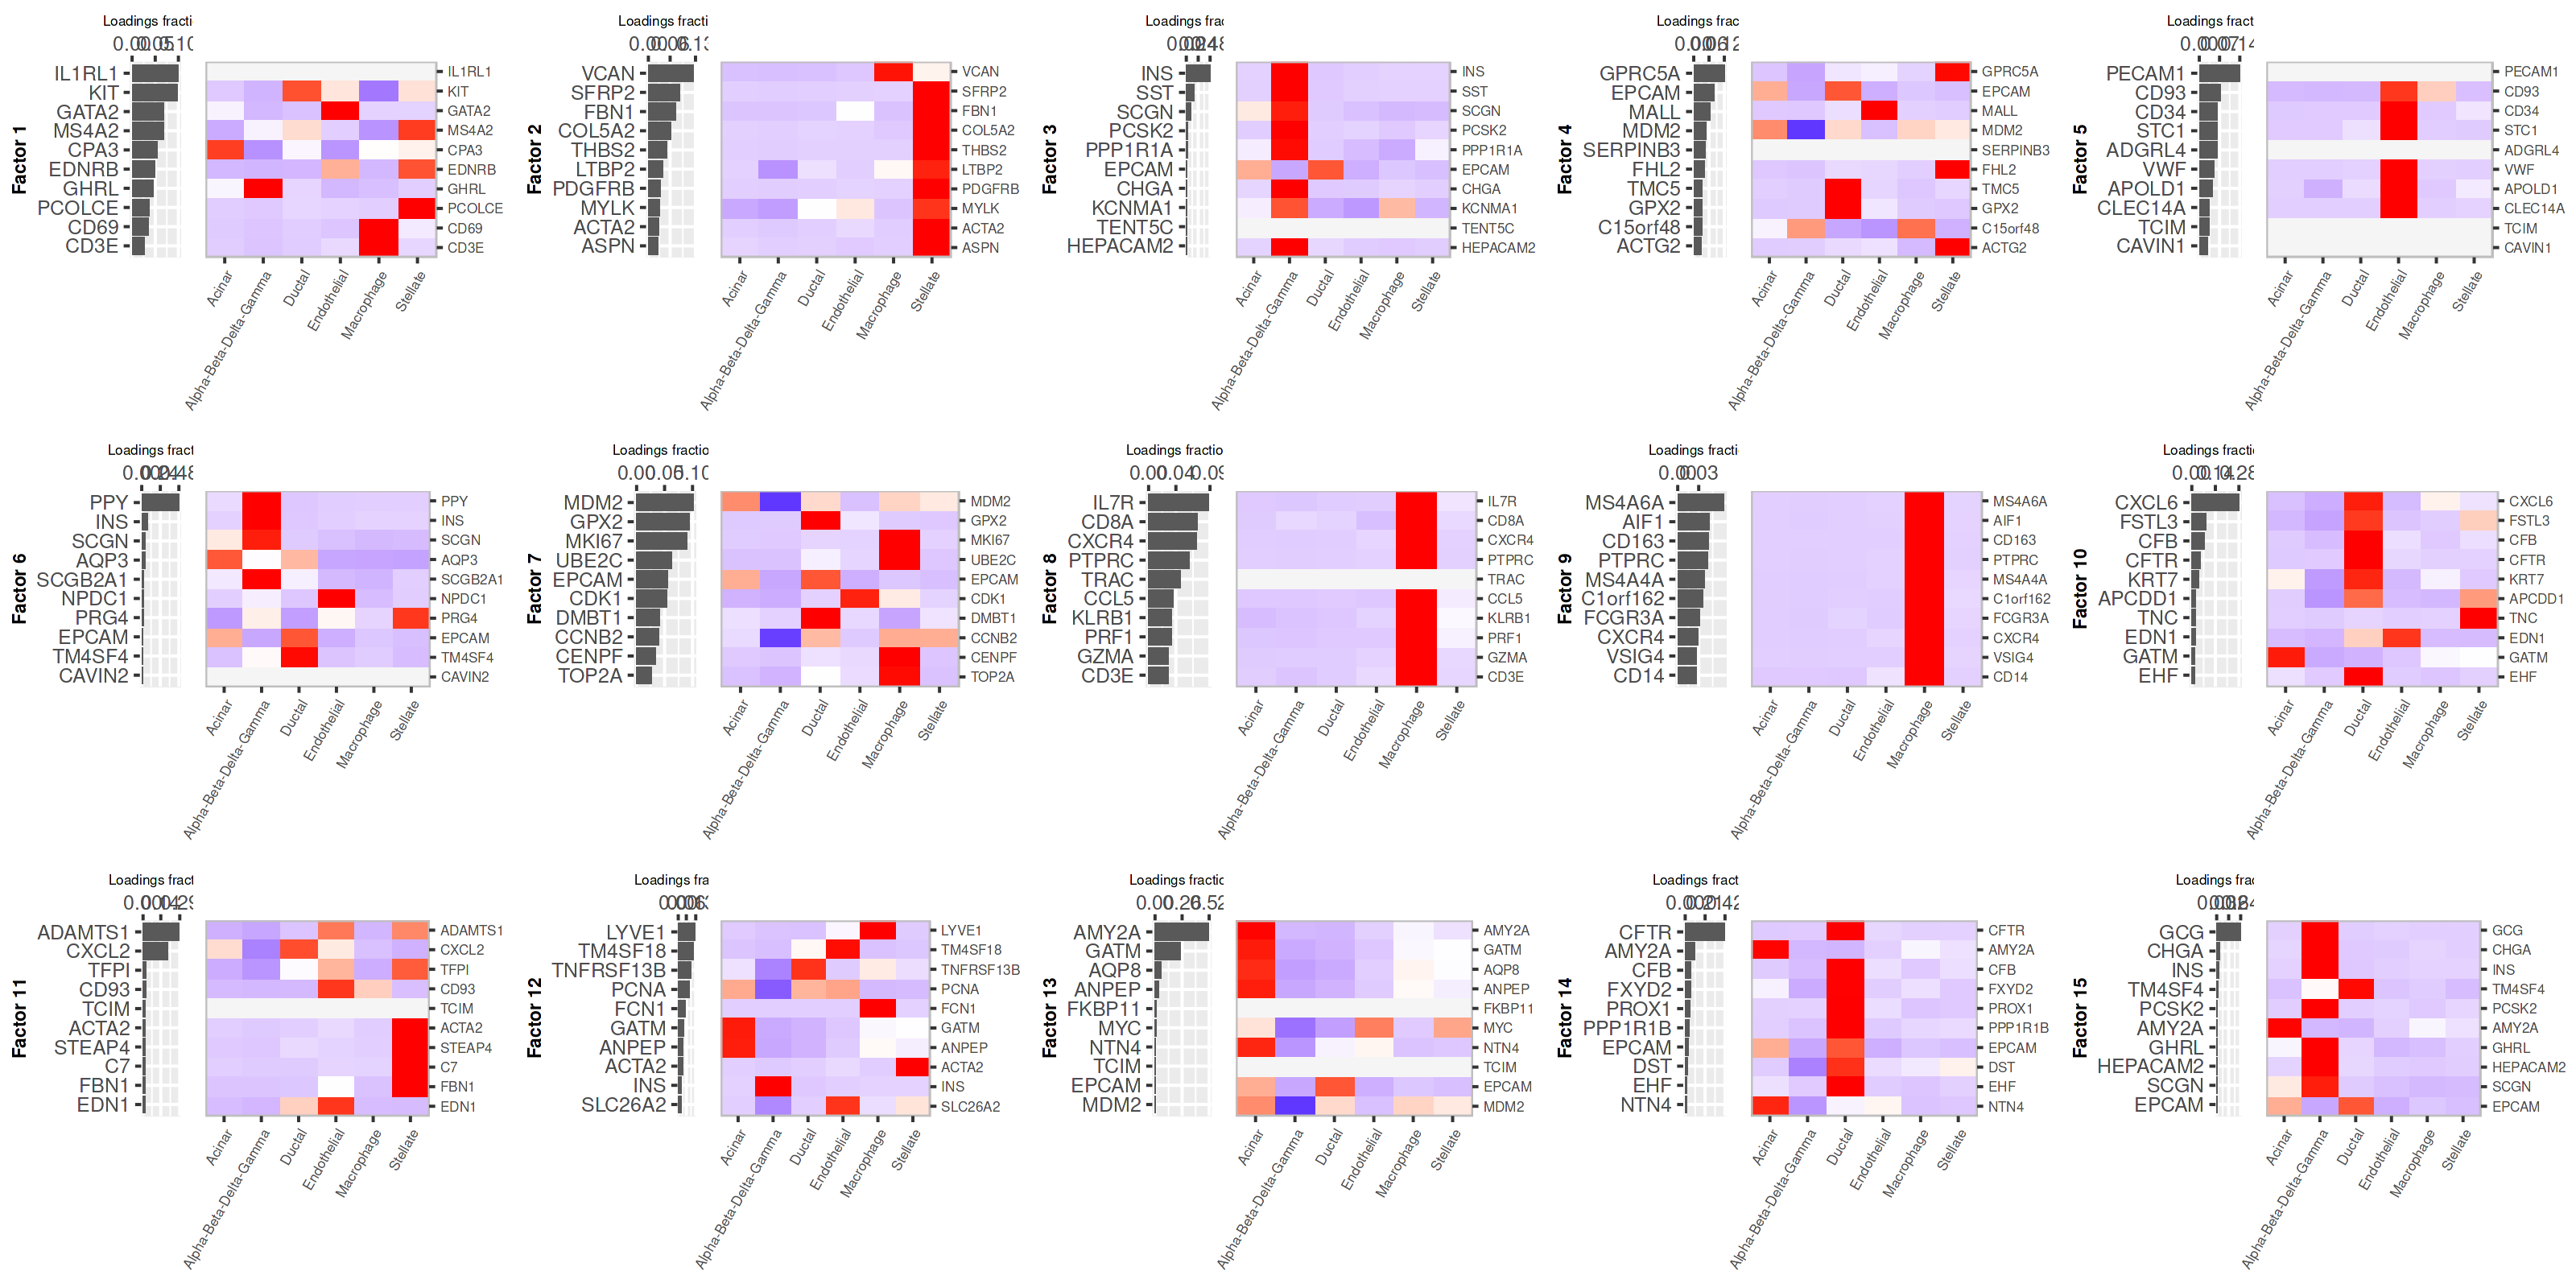

In [5]:
options(repr.plot.width = 16, repr.plot.height = 8, repr.plot.res = 200)

# plot the top loadings and corresponding scRNAseq expression
p1 <- plot_nmf_loadings(res, ct.exp=ct_exp, nplt.row=3)
p1

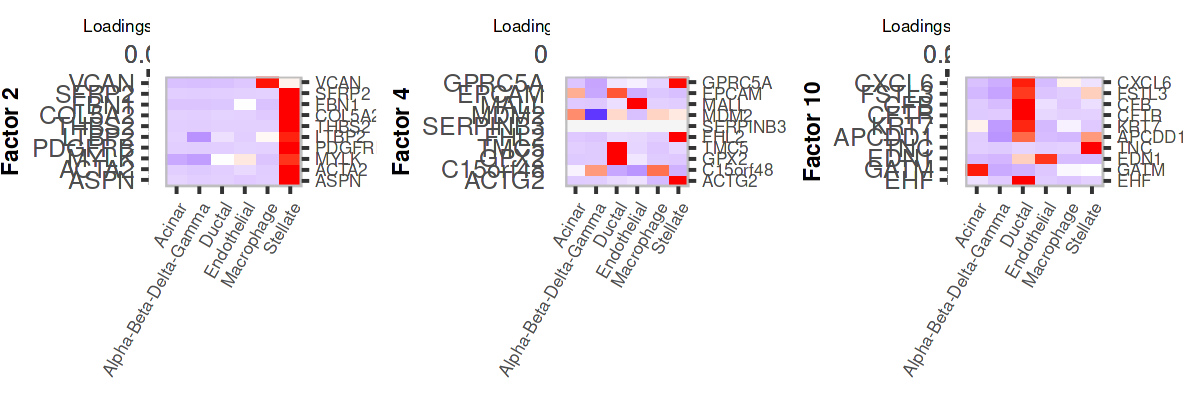

In [6]:
options(repr.plot.width = 6, repr.plot.height = 2, repr.plot.res = 200)

# plotting just the OD mature factor, inhibitory factor, and microglia
p2 <- plot_nmf_loadings(res, ct.exp=ct_exp, f.show=c(2,4,10), nplt.row=1)
p2

In [7]:
pdf(OutputPath("panc_nmf_fib_mal.pdf"), useDingbats=FALSE, width=3.2, height=4)
p2
dev.off()

png 
  2